1. Idetify the missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it

In [3]:
import pandas as pd
df=pd.read_csv("/content/dataset.csv")
missing_values=df.isnull().sum()
missing_rows=df[df.isnull().any(axis=1)]

incorrect_data=df[df['bill_length_mm']<0]
df_cleaned=df[df['bill_length_mm']>=0]
df_cleaned.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


2. What is the average Body_mass_g for Gentoo penguins?

In [4]:
gentoo_penguins=df[df['species']=='Gentoo']
avg_body_mass=gentoo_penguins['body_mass_g'].mean()
avg_body_mass

5133.739837398374

3. How do the distribution of bill_length_mm and bill_depth_mm differ between the three penguins? Analuze the skewness and kurtosis of each feature for different species

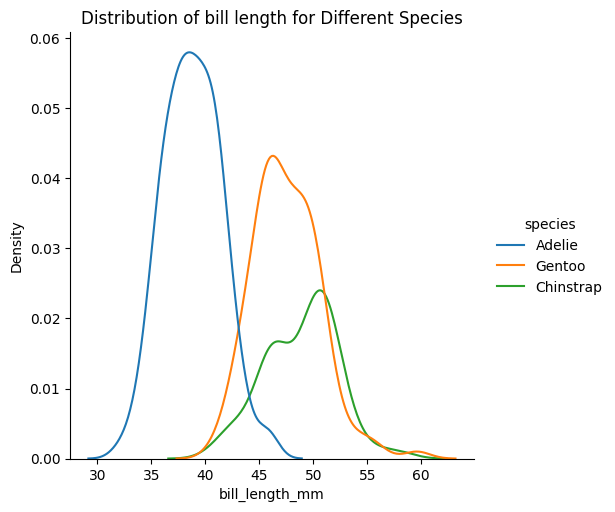

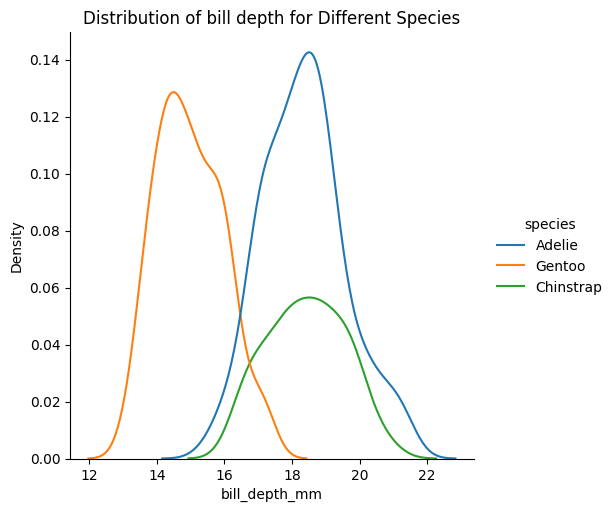

Species: Adelie
Bill Length Skewness: nan,Kurtosis: nan
Bill Depth Skewness: nan,Kurtosis: nan
Species: Gentoo
Bill Length Skewness: nan,Kurtosis: nan
Bill Depth Skewness: nan,Kurtosis: nan
Species: Chinstrap
Bill Length Skewness: nan,Kurtosis: nan
Bill Depth Skewness: 0.0067259608078862046,Kurtosis: -0.898739653084359


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis
sns.displot(data=df,x='bill_length_mm',hue='species',kind='kde')
plt.title('Distribution of bill length for Different Species')
sns.displot(data=df,x='bill_depth_mm',hue='species',kind='kde')
plt.title('Distribution of bill depth for Different Species')
plt.show()

for species in df['species'].unique():
  species_data=df[df['species']==species]
  bill_length_skew=skew(species_data['bill_length_mm'])
  bill_depth_skew=skew(species_data['bill_depth_mm'])
  bill_length_kurtosis=kurtosis(species_data['bill_length_mm'])
  bill_depth_kurtosis=kurtosis(species_data['bill_depth_mm'])

  print(f"Species: {species}")
  print(f"Bill Length Skewness: {bill_length_skew},Kurtosis: {bill_length_kurtosis}")
  print(f"Bill Depth Skewness: {bill_depth_skew},Kurtosis: {bill_depth_kurtosis}")


4. Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers?

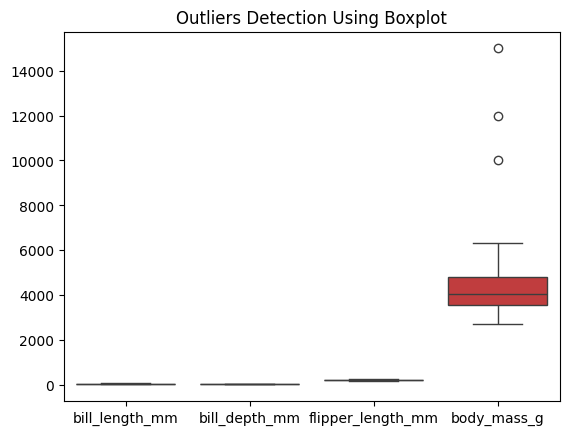

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [11]:
import seaborn as sns
sns.boxplot(data=df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])
plt.title('Outliers Detection Using Boxplot')
plt.show()

from scipy.stats import zscore
z_scores=df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].apply(zscore)
outliers=(z_scores>3) | (z_scores<-3)
outliers_data=df[outliers.any(axis=1)]
outliers_data

5. Does this dataset contribute to the curse of dimensionality? if yes, perform PCA

<function matplotlib.pyplot.show(close=None, block=None)>

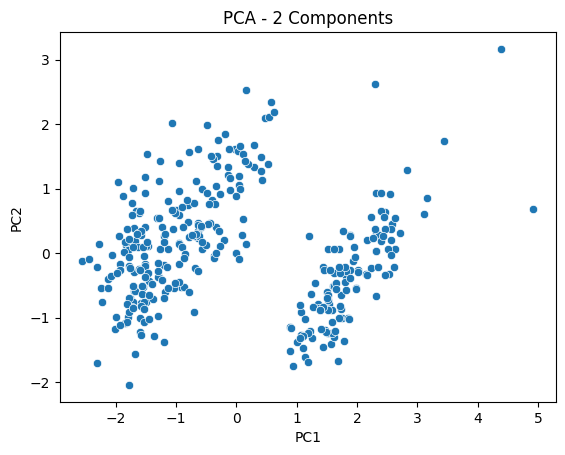

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_imputed)
pca=PCA(n_components=2)
principal_components=pca.fit_transform(df_scaled)
pca_df=pd.DataFrame(data=principal_components,columns=['PC1','PC2'])
sns.scatterplot(data=pca_df,x='PC1',y='PC2')
plt.title('PCA - 2 Components')
plt.show


6. Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them

<Axes: >

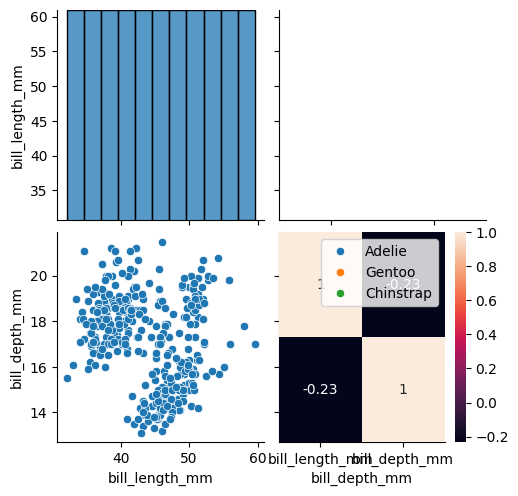

In [16]:
sns.pairplot(df[['bill_length_mm', 'bill_depth_mm', 'species']])
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df)
sns.lineplot(x='bill_length_mm', y='bill_depth_mm', data=df)
sns.violinplot(x='species', y='bill_length_mm', data=df)
sns.boxplot(x='species', y='bill_length_mm', data=df)
sns.regplot(x='bill_length_mm', y='bill_depth_mm', data=df)
corr_matrix = df[['bill_length_mm', 'bill_depth_mm']].corr()
sns.heatmap(corr_matrix, annot=True)


7. Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island?

In [18]:
max_flipper=df.groupby(['species','island'])['flipper_length_mm'].max()
max_flipper


species    island   
Adelie     Biscoe       203.0
           Dream        208.0
           Torgersen    210.0
Chinstrap  Dream        212.0
Gentoo     Biscoe       231.0
Name: flipper_length_mm, dtype: float64

8. Perform z-score normalization on this dataset

In [19]:
df_zscore = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
df_zscore_normalized=df_zscore.apply(zscore)
df_zscore_normalized.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
